In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
base = 'results/'

# Load data
cuda = pd.read_csv(base + 'cuda.csv')
pthreads = pd.read_csv(base + 'pthreads.csv')
sequential = pd.read_csv(base + 'sequential.csv')
params = pd.read_csv(base + 'params.csv')

In [20]:
sequential.head()

,data,time,size
0,small,1.50,256
1,medium,14.11,2560
2,large,136.26,25600


In [22]:
pthreads.head()

,data,2,4,8,16,32
0,small,1.24,0.86,0.83,0.87,1.00
1,medium,11.51,7.44,7.53,7.75,8.57
2,large,117.93,74.00,74.80,75.62,81.34


In [33]:
cuda.head()

,data,2,4,8,16,32
0,small,0.50,0.49,0.45,0.46,0.45
1,medium,2.86,2.69,2.69,2.59,2.65
2,large,25.75,23.02,23.20,22.22,22.31


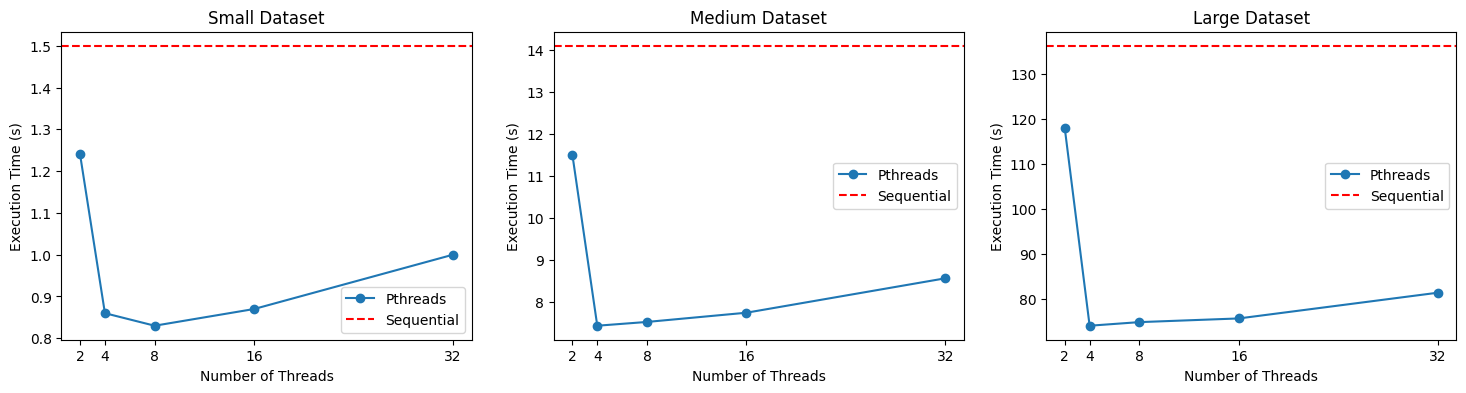

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharey=False)  # Change sharey to False
threads = [2, 4, 8, 16, 32]

for i, size in enumerate(["small", "medium", "large"]):
    ax = axes[i]
    sequential_time = sequential[sequential['data'] == size]['time'].values[0]
    parallel_times = pthreads[pthreads['data'] == size].iloc[0, 1:]
    # print(parallel_times)
    
    ax.plot(threads, parallel_times, marker='o', label='Pthreads')
    ax.axhline(y=sequential_time, color='r', linestyle='--', label='Sequential')
    
    ax.set_title(f"{size.capitalize()} Dataset")
    ax.set_xlabel("Number of Threads")
    ax.set_xticks(threads)
    ax.set_ylabel("Execution Time (s)")
    ax.legend()

# plt.tight_layout()
plt.show()


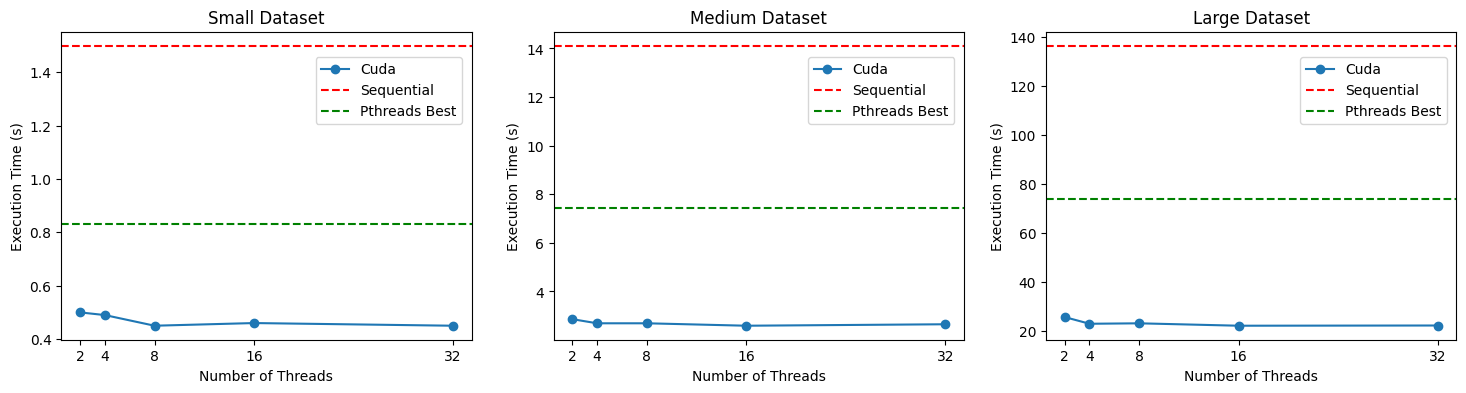

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharey=False)  # Change sharey to False
threads = [2, 4, 8, 16, 32]

for i, size in enumerate(["small", "medium", "large"]):
    ax = axes[i]
    sequential_time = sequential[sequential['data'] == size]['time'].values[0]
    pthread_best = pthreads[pthreads['data'] == size].iloc[0, 1:].min()
    cuda_times = cuda[cuda['data'] == size].iloc[0, 1:]
    # print(parallel_times)
    
    ax.plot(threads, cuda_times, marker='o', label='Cuda')
    ax.axhline(y=sequential_time, color='r', linestyle='--', label='Sequential')
    ax.axhline(y=pthread_best, color='g', linestyle='--', label='Pthreads Best')
    
    ax.set_title(f"{size.capitalize()} Dataset")
    ax.set_xlabel("Number of Threads")
    ax.set_xticks(threads)
    ax.set_ylabel("Execution Time (s)")
    ax.legend(loc=(0.62, 0.7))

# plt.tight_layout()
plt.show()